In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "tripdata12months"

## Introduction

This is my Capstone Project for the Google Data Analytics Cetification. The R programming language was choose to clean, process, analyse and share my analysis.

## Summary

Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

The project description:
* Analyse datasets from Cyclistic - a bike-share company in Chicago.
* For the purpose of this case study I will use data collected between September 2021 - August 2022.
* Cyclistic is a **fictional company**, the raw data was collected from Motivate International Inc.The dataset is located [Here](https://www.divvybikes.com/system-data)

## Business Question:

    How do annual members and casual riders use Cyclistic bikes differently?

**Install Packages required**

In [2]:
library(tidyverse) #data import and wrangling
library(lubridate) #date functions
library(geosphere) #package used to calculate the ride distance traveled


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Step 1: Collect Data

In [3]:
Sep21 <- read_csv("../input/tripdata12months/202109-divvy-tripdata.csv")
Oct21 <- read_csv("../input/tripdata12months/202110-divvy-tripdata.csv")
Nov21 <- read_csv("../input/tripdata12months/202111-divvy-tripdata.csv")
Dec21 <- read_csv("../input/tripdata12months/202112-divvy-tripdata.csv")
Jan22 <- read_csv("../input/tripdata12months/202201-divvy-tripdata.csv")
Feb22 <- read_csv("../input/tripdata12months/202202-divvy-tripdata.csv")
Mar22 <- read_csv("../input/tripdata12months/202203-divvy-tripdata.csv")
Apr22 <- read_csv("../input/tripdata12months/202204-divvy-tripdata.csv")
May22 <- read_csv("../input/tripdata12months/202205-divvy-tripdata.csv")
Jun22 <- read_csv("../input/tripdata12months/202206-divvy-tripdata.csv")
Jul22 <- read_csv("../input/tripdata12months/202207-divvy-tripdata.csv")
Aug22 <- read_csv("../input/tripdata12months/202208-divvy-tripdata.csv")

Rows: 756147 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 631226 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 359978 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

## Step 2: Wrangle data and combine into a single file


### 2.1 - Comparing column names each of the files

In [4]:
colnames(Sep21)
colnames(Oct21)
colnames(Nov21)
colnames(Dec21)
colnames(Jan22)
colnames(Feb22)
colnames(Mar22)
colnames(Apr22)
colnames(May22)
colnames(Jun22)
colnames(Jul22)
colnames(Aug22)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

### 2.2 - Gathering all data frames in one Big Data frame**

In [5]:
all_trips <- bind_rows(Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,Mar22,Apr22,May22,Jun22,Jul22,Aug22)

**Inspecting the new table**

In [6]:
paste0("The new table has ", nrow(all_trips)," rows.")
head(all_trips)

[1] "The new table has 5883043 rows."

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NA,NA,NA,NA,41.89,-87.68,41.89,-87.67,casual
F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NA,NA,NA,NA,41.94,-87.64,41.98,-87.67,casual
6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NA,NA,NA,NA,41.81,-87.72,41.80,-87.72,casual
78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NA,NA,NA,NA,41.80,-87.72,41.81,-87.72,casual
E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NA,NA,NA,NA,41.88,-87.74,41.88,-87.71,casual
346DE323A2677DC0,electric_bike,2021-09-28 01:53:18,2021-09-28 02:00:02,NA,NA,NA,NA,41.87,-87.75,41.88,-87.74,casual


## Step 3: Prepare dataset

**Checking distinct values in "member_casual" column**

In [7]:
table(all_trips$member_casual)


 casual  member 
2468479 3414564 

### 3.1 - Add "ride_length" column in seconds

In [8]:
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at, units = "secs")

**Converting "ride_length" to numeric**

In [9]:
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

**Add a new column converting "ride_length" to minute**

In [10]:
all_trips$ride_length_min <- round(all_trips$ride_length / 60, 2)

### 3.2 - Add columns for date, year, month, day_of_week, day and hours. 

In [11]:
all_trips$date <- as.Date(all_trips$started_at) # format yyyy-mm-dd
all_trips$year <- format(as.Date(all_trips$date),"%Y")
all_trips$month <- format(as.Date(all_trips$date),"%m")
all_trips$day_of_week <- format(as.Date(all_trips$date),"%A")
all_trips$day <- format(as.Date(all_trips$date),"%d")
all_trips$hour <- strftime(all_trips$started_at,"%H")

### 3.3 - Calculating the ride distance traveled in meters using "geosphere" package**

In [12]:
all_trips$ride_distance <- distGeo(matrix(c(all_trips$start_lng, all_trips$start_lat), ncol=2), matrix(c(all_trips$end_lng, all_trips$end_lat), ncol=2))

## Step 4: Clean dataset

### Dropping "bad" data

### 4.1- Removing rows with "ride_length" less than zero

**The data include a few hundred entries with "ride_length" negative**

In [13]:
all_trips %>% 
  filter(ride_length < 0) %>% 
  summarize(duration_less_zero = n())

duration_less_zero
<int>
135


**Removing these rows**

In [14]:
all_trips_cleaned <- all_trips[!(all_trips$ride_length <= 0),]

### 4.2- There are rows with no recorded station names**

In [15]:
paste0("There are ",sum(is.na(all_trips_cleaned$start_station_name) | is.na(all_trips_cleaned$end_station_name))," blank rows in station name columns.")

[1] "There are 1322582 blank rows in station name columns."

**These incomplete rows should be removed**

In [16]:
all_trips_cleaned <- all_trips_cleaned[!(is.na(all_trips_cleaned$start_station_name) | is.na(all_trips_cleaned$end_station_name)),]

### 4.3- Removing Duplicated Rows

In [17]:
all_trips_cleaned <- all_trips_cleaned[!duplicated(all_trips_cleaned$ride_id),]

#### Inspecting the new table

In [18]:
paste0("The new table has ", nrow(all_trips_cleaned)," rows.")
head(all_trips_cleaned)

[1] "The new table has 4559855 rows."

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,member_casual,ride_length,ride_length_min,date,year,month,day_of_week,day,hour,ride_distance
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
E92C804563F261EC,classic_bike,2021-09-05 01:25:08,2021-09-05 01:35:46,Wells St & Walton St,TA1306000011,Desplaines St & Kinzie St,TA1306000003,41.89993,-87.63443,⋯,casual,638,10.63,2021-09-05,2021,09,Sunday,05,01,1497.511954
9ECA91210441E847,classic_bike,2021-09-05 13:33:41,2021-09-05 14:06:08,Larrabee St & Armitage Ave,TA1309000006,Clark St & Leland Ave,TA1309000014,41.91808,-87.64375,⋯,casual,1947,32.45,2021-09-05,2021,09,Sunday,05,13,5787.201780
3DAA144C4E85E3AA,classic_bike,2021-09-04 23:00:21,2021-09-04 23:10:00,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.88132,-87.62952,⋯,casual,579,9.65,2021-09-04,2021,09,Saturday,04,23,0.000000
53B99FE9BD0D35F8,classic_bike,2021-09-14 16:25:16,2021-09-14 16:35:03,Kingsbury St & Kinzie St,KA1503000043,Orleans St & Elm St,TA1306000006,41.88918,-87.63851,⋯,casual,587,9.78,2021-09-14,2021,09,Tuesday,14,16,1528.324769
2DB60C25C8CE3591,classic_bike,2021-09-13 22:34:54,2021-09-13 22:34:58,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.90096,-87.62378,⋯,casual,4,0.07,2021-09-13,2021,09,Monday,13,22,0.000000
1639A96F29FF2E62,electric_bike,2021-09-14 10:18:52,2021-09-14 10:18:58,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.88119,-87.62979,⋯,casual,6,0.10,2021-09-14,2021,09,Tuesday,14,10,9.072183


## Step 6: Data analysis

### 6.1- Analysing rides and distance**

In [19]:
summary(all_trips_cleaned$ride_length_min) # ride duration in minutes

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     6.28    11.00    18.00    19.75 40705.02 

In [20]:
all_trips_cleaned$ride_distance_km <- round(all_trips_cleaned$ride_distance / 1000, 2)
summary(all_trips_cleaned$ride_distance_km) # distance in Kilometers

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    0.890    1.590    2.106    2.760 1192.250 

### 6.2- Comparing number of trips, duration and distance by members and casual

  #### 6.2.1- Avg and max ride time and ride distance**

In [21]:
ride_summary <- all_trips_cleaned %>% 
  group_by(member_casual) %>% 
  summarise(number_of_rides = n(),percent = round(length(member_casual)/nrow(all_trips_cleaned),2), avg_duration_min = round(mean(ride_length_min),2), max_duration_min = max(ride_length_min), avg_dist_km = round(mean(ride_distance_km),2), max_dist_km = max(ride_distance_km))

ride_summary

member_casual,number_of_rides,percent,avg_duration_min,max_duration_min,avg_dist_km,max_dist_km
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1877864,0.41,25.79,40705.02,2.18,1192.25
member,2681991,0.59,12.55,1492.92,2.05,27.47


In [22]:
nrow(all_trips_cleaned)

[1] 4559855

58% of rides are from members they spend 104% less time in there trips and the average distance traveled is very similar with casual users.

#### 6.2.2- Average ride time and ride distance by day of the week**

In [23]:
# Ordering the days of the week in correctly
all_trips_cleaned$day_of_week <- ordered(all_trips_cleaned$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

analyse_wday <- all_trips_cleaned %>% 
  group_by(member_casual,day_of_week) %>% 
  summarize(number_of_rides = n(), avg_duration_min = round(mean(ride_length_min),2), avg_dist_km = round(mean(ride_distance_km),2)) %>%
  arrange(day_of_week,member_casual)

analyse_wday

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,number_of_rides,avg_duration_min,avg_dist_km
<chr>,<ord>,<int>,<dbl>,<dbl>
casual,Sunday,343987,29.72,2.25
member,Sunday,313818,14.13,2.12
casual,Monday,221065,26.78,2.10
member,Monday,376546,12.16,2.02
casual,Tuesday,205509,22.57,2.10
member,Tuesday,426874,11.81,2.02
casual,Wednesday,216892,22.08,2.11
member,Wednesday,434692,11.92,2.04
casual,Thursday,230975,22.77,2.14


## Step 7 - Data Visualization

  ### 7.1 - Analysing riders type by weekday

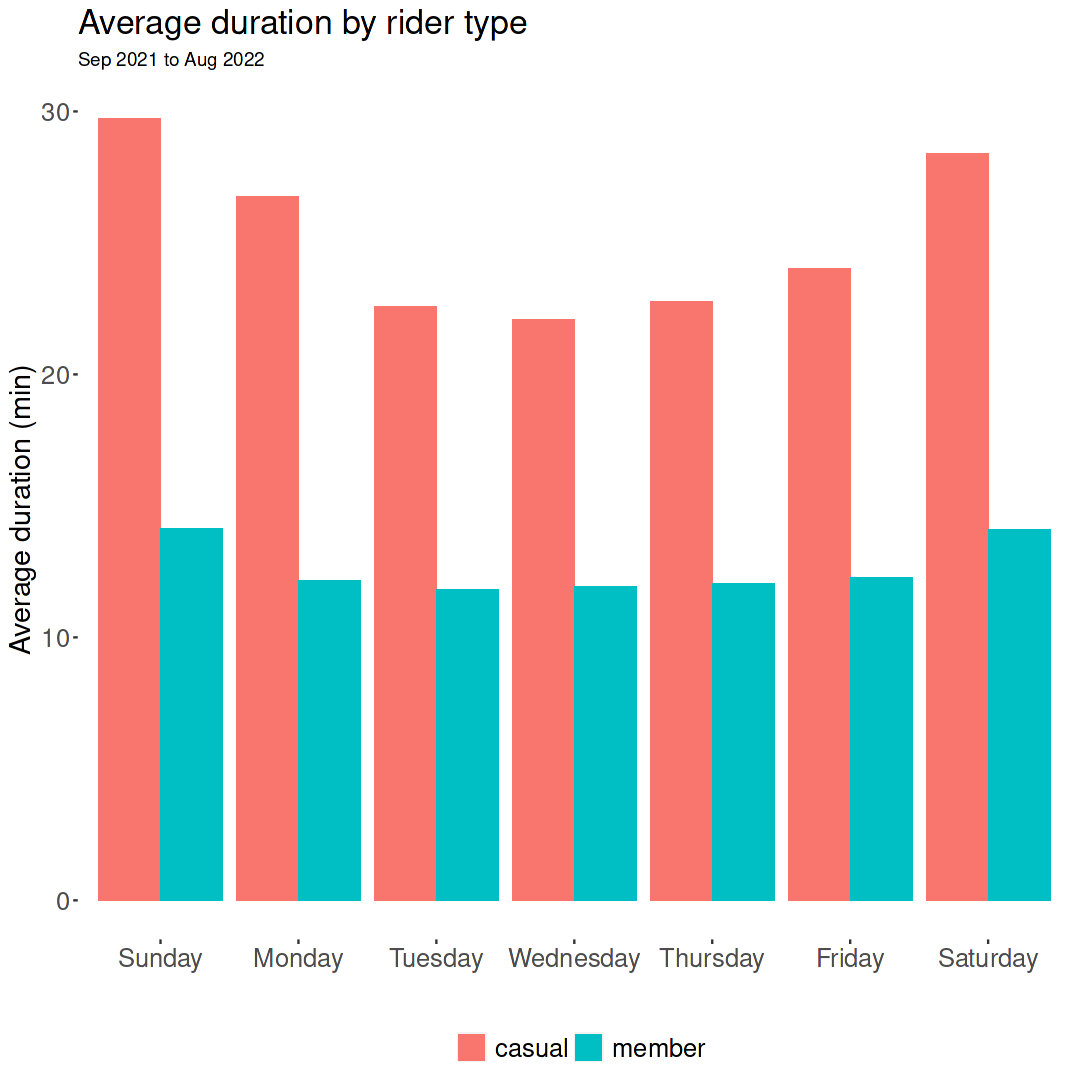

In [24]:
#A function we use to resize our visualizations
display <- function(width, heigth){options(repr.plot.width = width, repr.plot.height = heigth)}
display(9,9)

analyse_wday %>% 
  ggplot(aes(x=day_of_week,y=avg_duration_min, fill=member_casual)) +
  geom_col(position = "dodge")+
  labs(title = "Average duration by rider type", subtitle = "Sep 2021 to Aug 2022", x="", y="Average duration (min)", fill= "")+
  theme(legend.position = "bottom",legend.text = element_text(size=15),panel.background = element_rect(fill="white"), axis.text = element_text(size=15),axis.title = element_text(size=17),plot.title = element_text(size=20))

The average duration of rides decrease in the midle of the week for casual users and remains stable for member user.

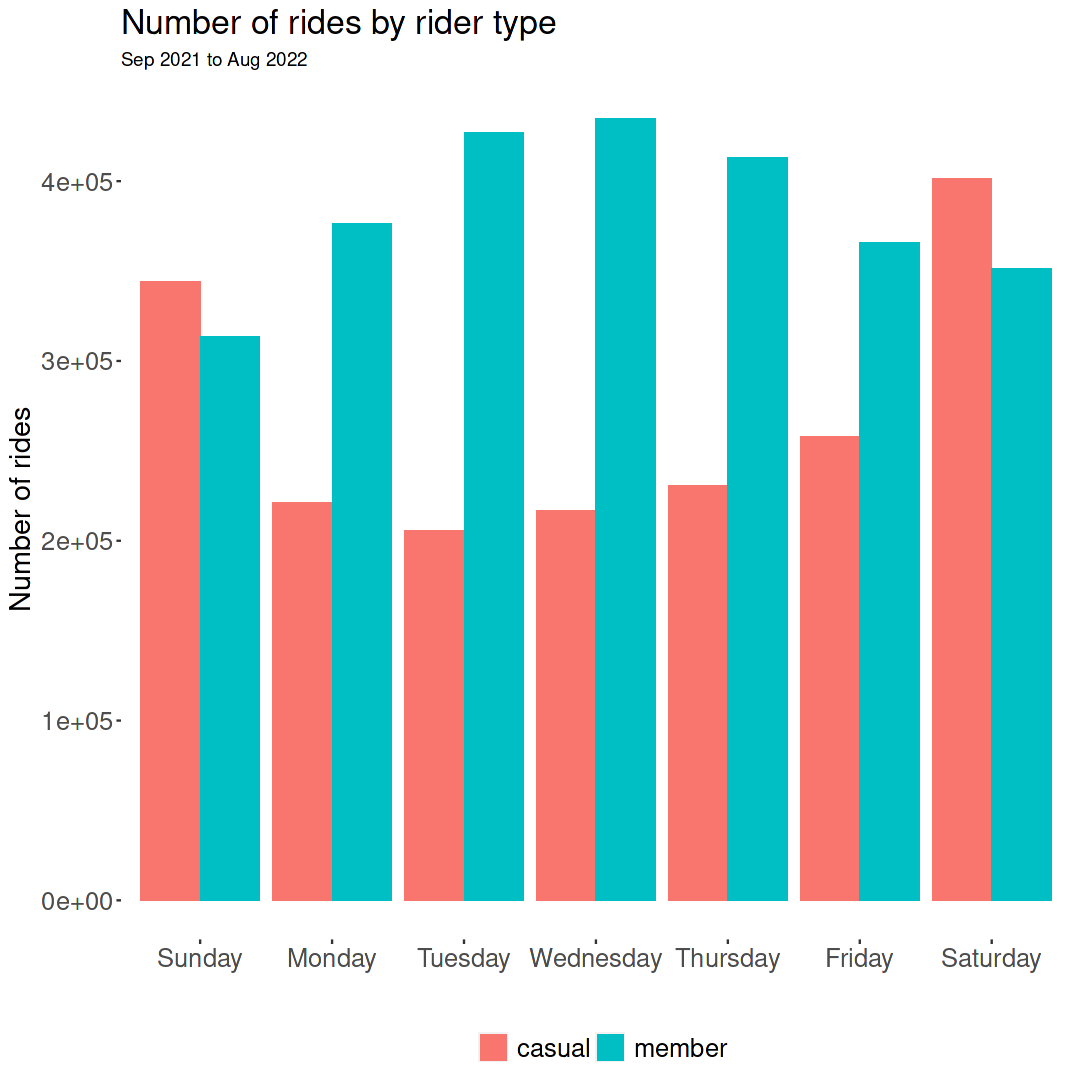

In [25]:
display(9,9)
analyse_wday %>% 
  ggplot(aes(x=day_of_week,y=number_of_rides, fill=member_casual)) +
  geom_col(position="dodge") +
  labs(title = "Number of rides by rider type", subtitle = "Sep 2021 to Aug 2022", x="", y="Number of rides", fill= "")+
  theme(legend.position = "bottom",legend.text = element_text(size=15),panel.background = element_rect(fill="white"), 
        axis.text = element_text(size=15),axis.title = element_text(size=17),plot.title = element_text(size=20))

The number of member rides increase in the midle of the week showing that the majority of members use bikes more regurlarly for commuting and casual riders might be more likely to utilise them for leisure.

### 7.2 - Bike types that members and casual are using

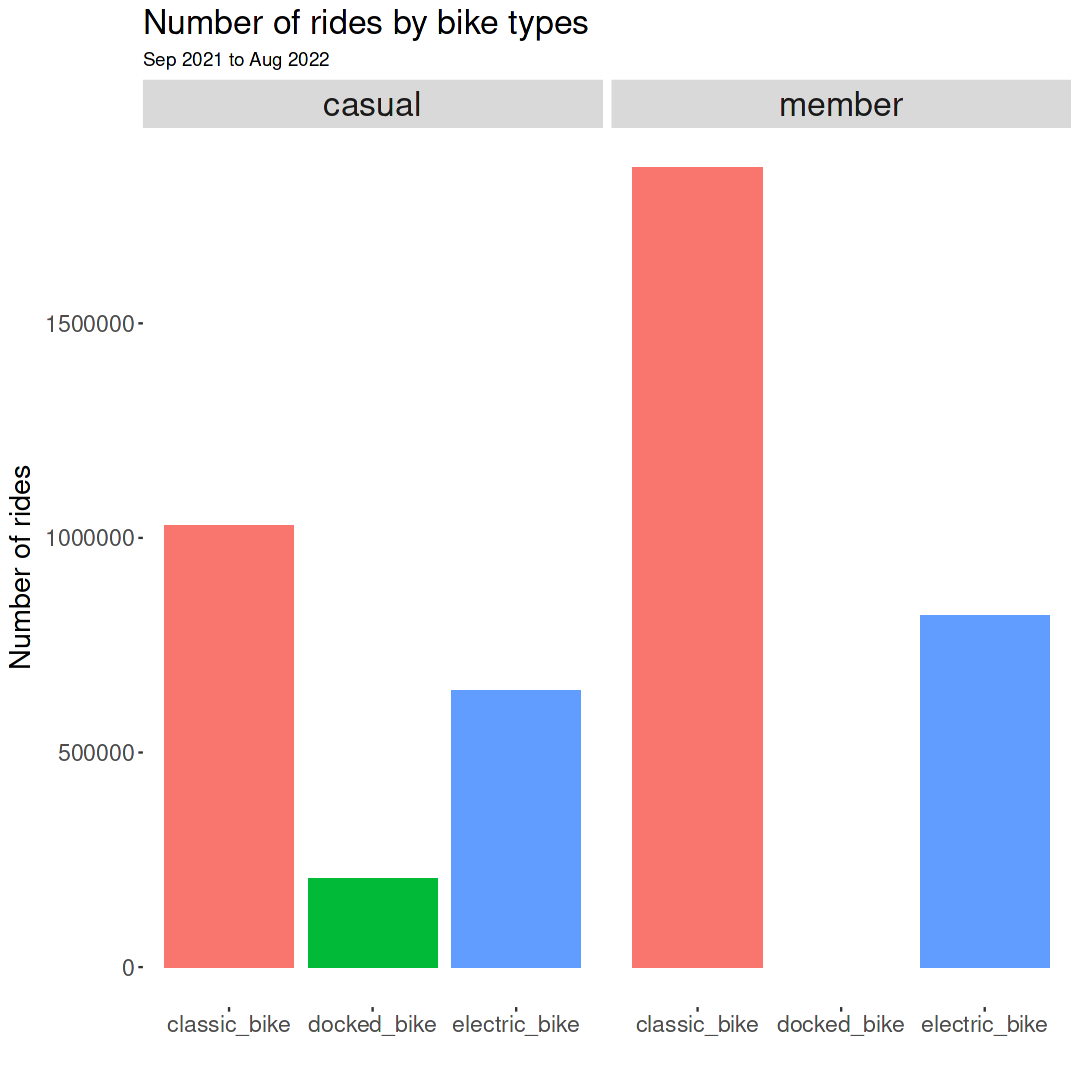

In [26]:
display(9,9)
all_trips_cleaned %>% 
  ggplot(aes(x=rideable_type, fill=rideable_type)) +
  geom_bar()+
  facet_wrap(~ member_casual)+
  labs(title = "Number of rides by bike types", subtitle = "Sep 2021 to Aug 2022", x="", y="Number of rides")+
  theme(strip.text.x = element_text(size=20),legend.position = "none",panel.background = element_rect(fill="white"), 
        axis.text = element_text(size=13.5),axis.title = element_text(size=17),plot.title = element_text(size=20))

In [27]:
all_trips_cleaned %>% group_by(rideable_type,member_casual)%>% summarise(percent = round(length(rideable_type)/nrow(all_trips_cleaned),2))


`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


rideable_type,member_casual,percent
<chr>,<chr>,<dbl>
classic_bike,casual,0.23
classic_bike,member,0.41
docked_bike,casual,0.05
electric_bike,casual,0.14
electric_bike,member,0.18


This table highlight that around 41% of the trips are made by members using classic bikes

  ### 7.3- Analysing stations
  
  ### Preparing data frames

In [28]:
# filter stations
stations <- all_trips_cleaned %>% 
  select(start_station_name,member_casual,start_lat,start_lng) 

# Create two data frames by riders type
casual_st <- stations[stations$member_casual == "casual",]
member_st <- stations[stations$member_casual == "member",]

# Creating two data frames by riders type which include number of trips, latitude and longitude coordinates for each station
map_casual <- casual_st %>% 
  select(start_station_name,start_lat,start_lng) %>% 
  group_by(start_station_name) %>% 
  mutate(num_trips = n()) %>% 
  distinct(start_station_name, .keep_all = TRUE) # There are more than on start_lat and start_lng by stations. ".keep_all" keep the first row

map_member <- member_st %>% 
  select(start_station_name,start_lat,start_lng) %>% 
  group_by(start_station_name) %>% 
  mutate(num_trips = n()) %>% 
  distinct(start_station_name, .keep_all = TRUE) # keeping the first row of start_lat, start_lng because they are not distinct by station name

  ### **Top 5 stations by riders type**
  
  #### **Casual**

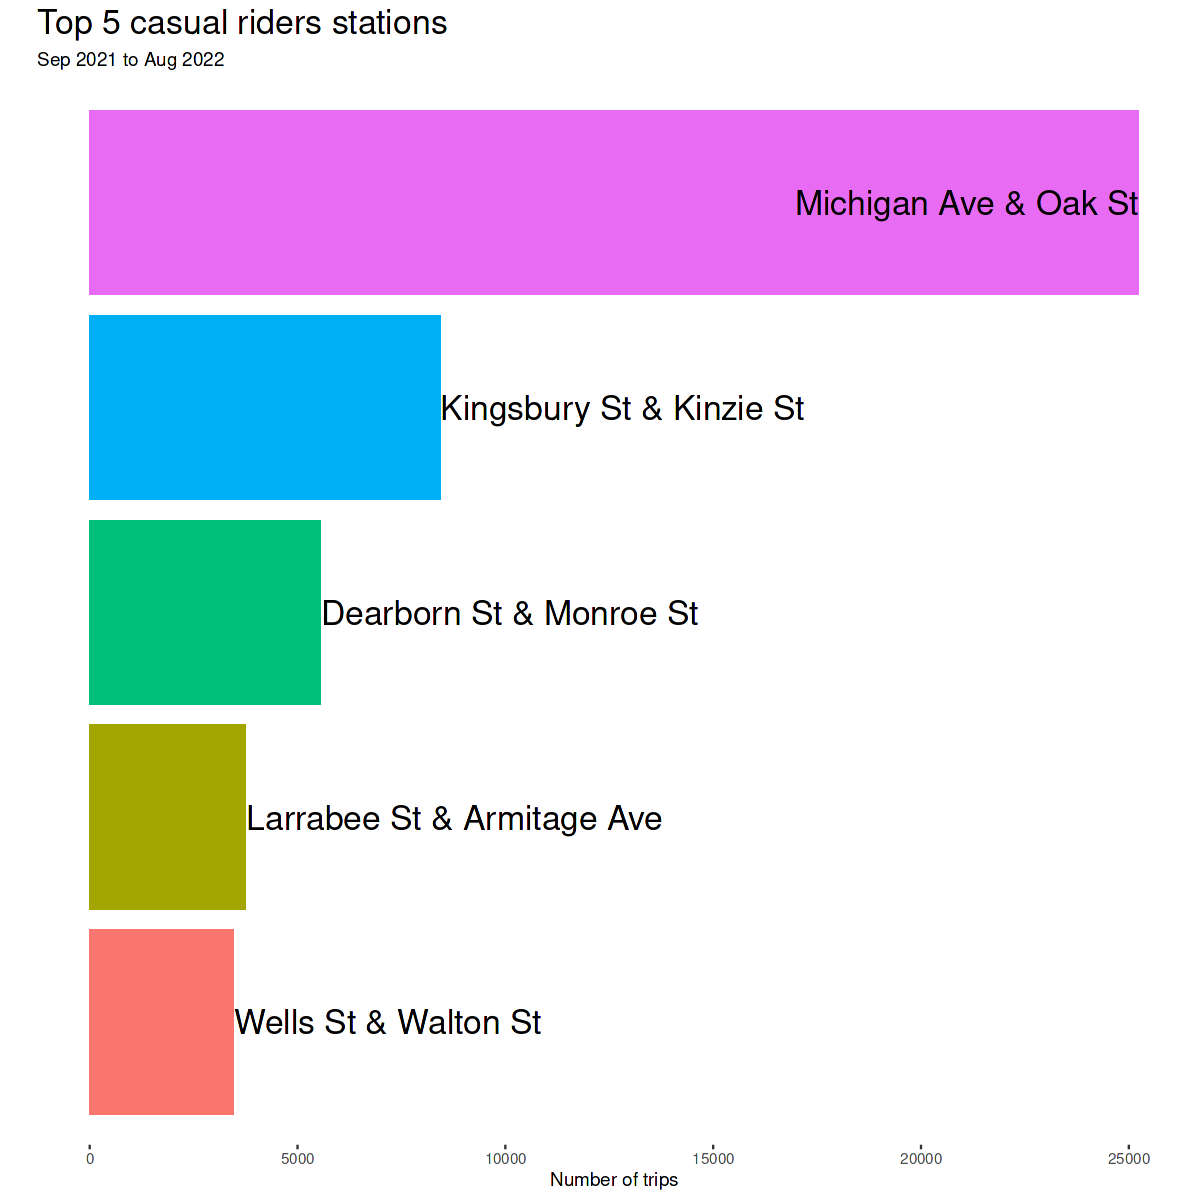

In [29]:
display(10,10)
map_casual_5 <- map_casual[1:5,] %>% arrange(-num_trips)
map_casual_5$start_station_name <- factor(map_casual_5$start_station_name, levels = map_casual_5$start_station_name[order(map_casual_5$num_trips, decreasing = FALSE)])

map_casual_5 %>% 
  ggplot(aes(x = start_station_name, y = num_trips, fill=start_station_name))+
  geom_col()+
  coord_flip()+
  geom_text(aes(label=start_station_name), hjust="inward", color="black",size=7)+
  theme(legend.position = "none",axis.text.y = element_blank(), axis.ticks.y = element_blank(), panel.background = element_rect(fill="white"),plot.title = element_text(size=20))+
  labs(x = "", y = "Number of trips", title = "Top 5 casual riders stations", subtitle = "Sep 2021 to Aug 2022")

#### **Member**

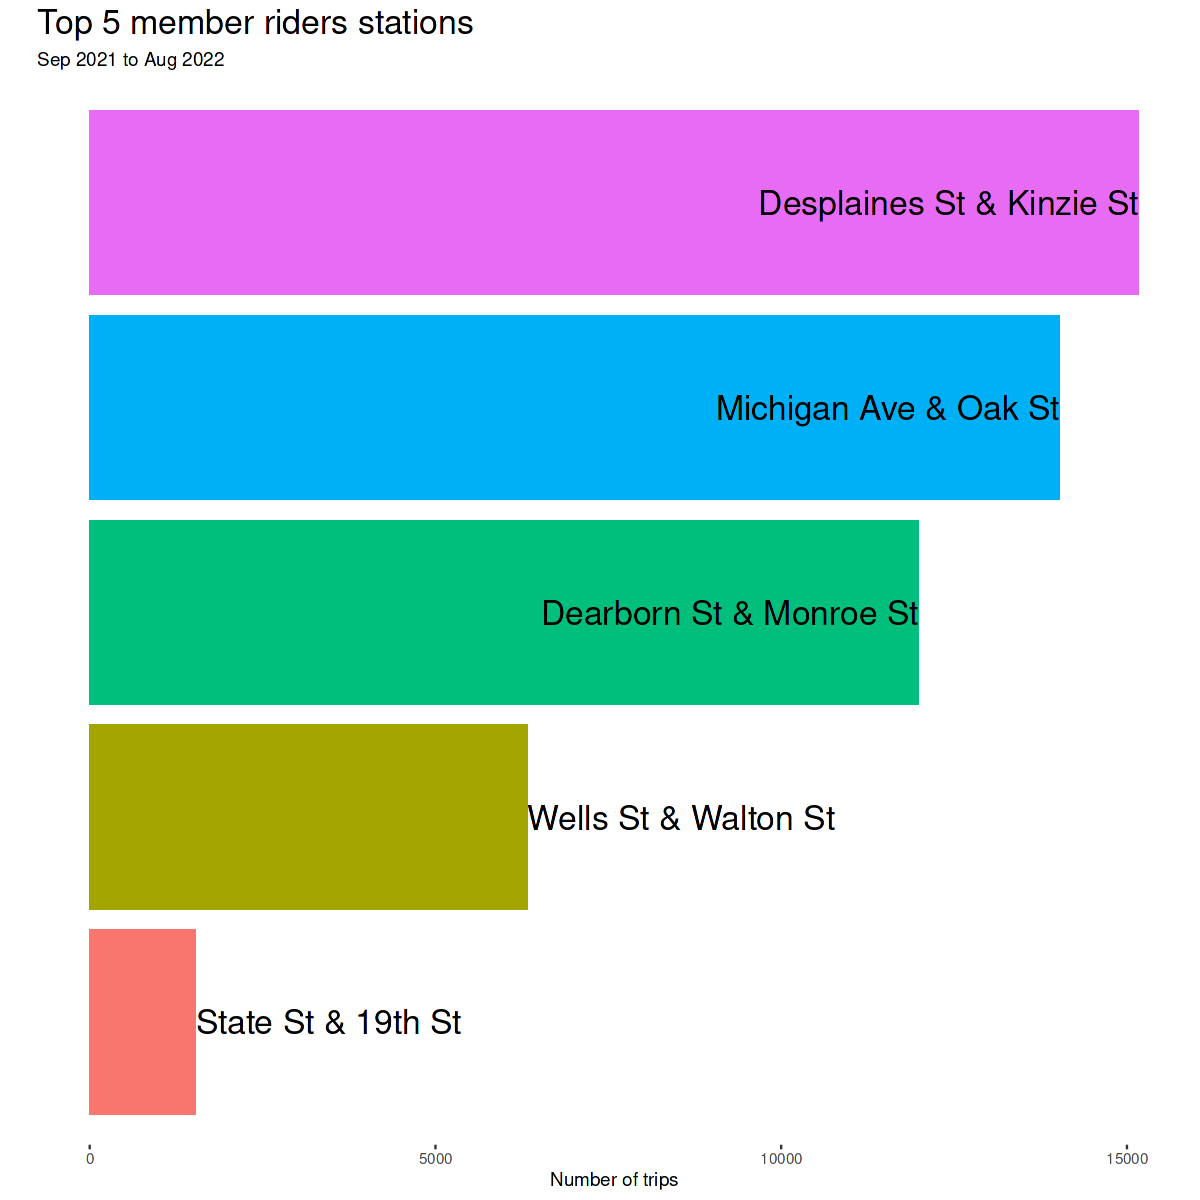

In [30]:
display(10,10)
map_member_5 <- map_member[1:5,] %>% arrange(-num_trips)
map_member_5$start_station_name <- factor(map_member_5$start_station_name, levels = map_member_5$start_station_name[order(map_member_5$num_trips, decreasing = FALSE)])

map_member_5 %>% 
  ggplot(aes(x = start_station_name, y = num_trips, fill=start_station_name))+
  geom_col()+
  coord_flip()+
  geom_text(aes(label=start_station_name), hjust = "inward", color="black",size=7)+
  theme(legend.position = "none",axis.text.y = element_blank(), axis.ticks.y = element_blank(), panel.background = element_rect(fill="white"),plot.title = element_text(size=20))+
  labs(x = "", y = "Number of trips", title = "Top 5 member riders stations", subtitle = "Sep 2021 to Aug 2022")

The top 5 stations reveals **three main stations** that both member users and casual users use: "Michigan Ave & Oak ST", "Dearborn St. & Monroe St" and "Wells St & Walton St"

### **Interactive leaflet to show the most popular stations**

 * Installing package to interactive format "leaflet"

In [31]:
library(leaflet)

#### **Casual**

In [32]:
mybins_casual <- seq(0, 56000, by = 7000)

mypalette_casual <- colorBin(palette ="plasma",domain = map_casual$num_trips, na.color = "transparent", bins = mybins_casual)

mytext <- paste(map_casual$start_station_name, " || ",
  "Number of trips: ", map_casual$num_trips, sep = "") 

vizmap_casual <- leaflet(map_casual) %>% 
  addTiles() %>%
  setView(lng = -87.6298, lat=41.8781, zoom = 13) %>% 
  addProviderTiles(providers$CartoDB.Positron) %>% 
  addCircleMarkers(lng = ~ start_lng, lat = ~ start_lat, fillColor = ~ mypalette_casual(num_trips), 
                   fillOpacity = 0.7, radius = 8, stroke = FALSE,label = mytext,
                   labelOptions = labelOptions(style = list("font-weight" = "normal", padding = "3px 8px"), textsize = "13px", direction = "auto")) %>%
  addLegend( 
    pal = mypalette_casual, 
    values = ~ num_trips, 
    opacity = 0.9,
    title = "# Casual Trips", 
    position = "bottomright"
    )

vizmap_casual

Warning message in mypalette_casual(num_trips):
“Some values were outside the color scale and will be treated as NA”


HTML widgets cannot be represented in plain text (need html)

#### **Member**

In [33]:
mybins_member <- seq(0, 25000, by = 5000)

mypalette_member <- colorBin(palette ="plasma",domain = map_member$num_trips, na.color = "transparent", bins = mybins_member)

mytext <- paste(map_member$start_station_name, " || ",
  "Number of trips: ", map_member$num_trips, sep = "") 

vizmap_member <- leaflet(map_member) %>% 
  addTiles() %>%
  setView(lng = -87.6298, lat=41.8781, zoom = 13) %>% 
  addProviderTiles(providers$CartoDB.Positron) %>% 
  addCircleMarkers(lng = ~ start_lng, lat = ~ start_lat, fillColor = ~ mypalette_member(num_trips), 
                   fillOpacity = 0.7, radius = 8, stroke = FALSE,label = mytext,
                   labelOptions = labelOptions(style = list("font-weight" = "normal", padding = "3px 8px"), textsize = "13px", direction = "auto")) %>%
  addLegend( 
    pal = mypalette_member, 
    values = ~ num_trips, 
    opacity = 0.9,
    title = "# Member Trips", 
    position = "bottomright"
    )
  
vizmap_member

Warning message in mypalette_member(num_trips):
“Some values were outside the color scale and will be treated as NA”


HTML widgets cannot be represented in plain text (need html)

### 7.4- Visualize trends by month

### Preparing data frame

In [34]:
df_month <- all_trips_cleaned %>% 
  select(ride_id,rideable_type,start_station_name,end_station_name,member_casual,ride_distance_km,ride_length_min,date,month,year,day_of_week,day) 
df_month <- unite(df_month,"month_year",year,month,sep = "-")

#### Create a summarily table by month

In [35]:
month_resume <- df_month %>%
  group_by(month_year, member_casual) %>% 
  summarise(rides_month = n(),avg_distance = round(mean(ride_distance_km),2))
month_resume

`summarise()` has grouped output by 'month_year'. You can override using the
`.groups` argument.


month_year,member_casual,rides_month,avg_distance
<chr>,<chr>,<int>,<dbl>
2021-09,casual,292920,2.27
2021-09,member,328183,2.10
2021-10,casual,189115,2.19
2021-10,member,288851,1.98
2021-11,casual,69958,2.00
2021-11,member,185909,1.86
2021-12,casual,45076,1.93
2021-12,member,131293,1.86
2022-01,casual,12605,1.84


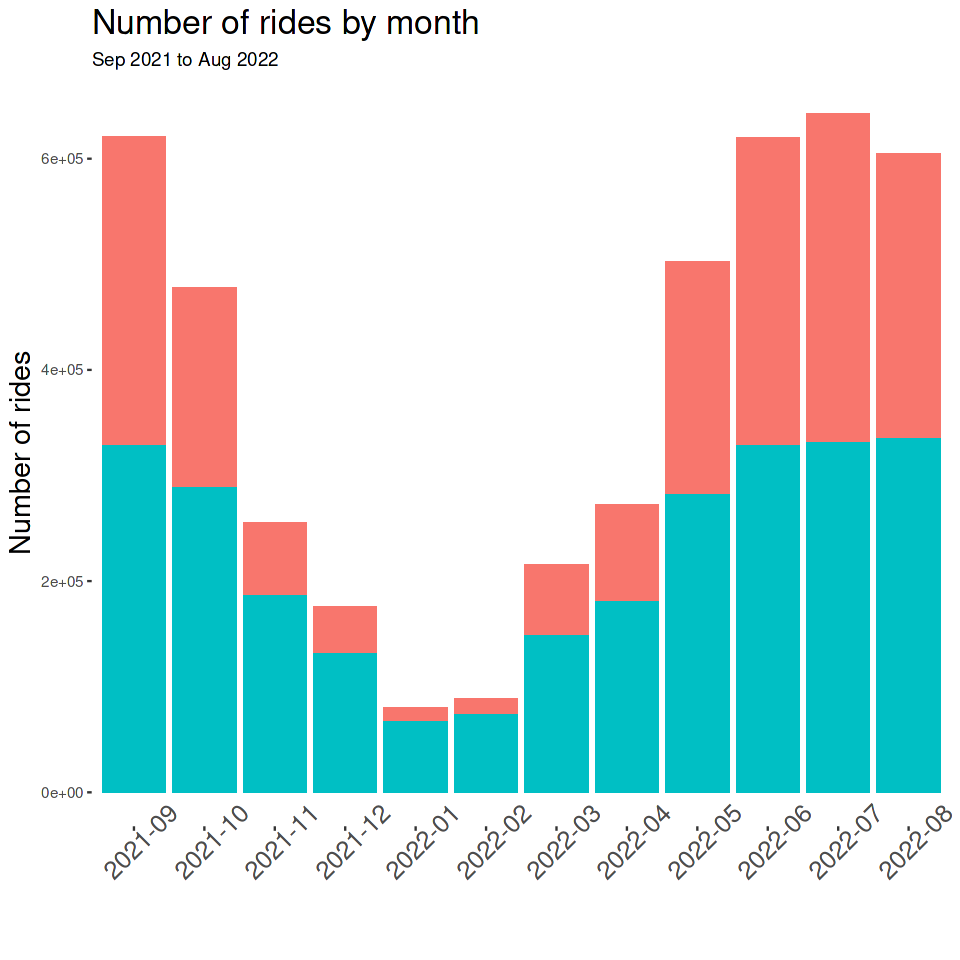

In [36]:
display(8,8)
month_resume %>% 
  ggplot(aes(x=month_year, y=rides_month, fill=member_casual))+
  geom_col()+
labs(title = "Number of rides by month", subtitle = "Sep 2021 to Aug 2022", x="", y="Number of rides",fill="")+
theme(legend.position = "none",
      panel.background = element_rect(fill="white"), axis.text.x = element_text(size=15,angle=45),axis.title = element_text(size=17),plot.title = element_text(size=20))

 

The number of rides decrease in the winter session.

In [37]:
byhour <- all_trips_cleaned %>%
    group_by(hour) %>%
    summarise(rides = n(), member = sum(member_casual == "member"), casual = sum(member_casual == "casual"))
byhour

hour,rides,member,casual
<chr>,<int>,<int>,<int>
00,61753,25960,35793
01,39371,15979,23392
02,22938,8695,14243
03,13238,5281,7957
04,11624,6281,5343
05,36772,27871,8901
06,98908,77811,21097
07,185152,146496,38656
08,223466,170680,52786


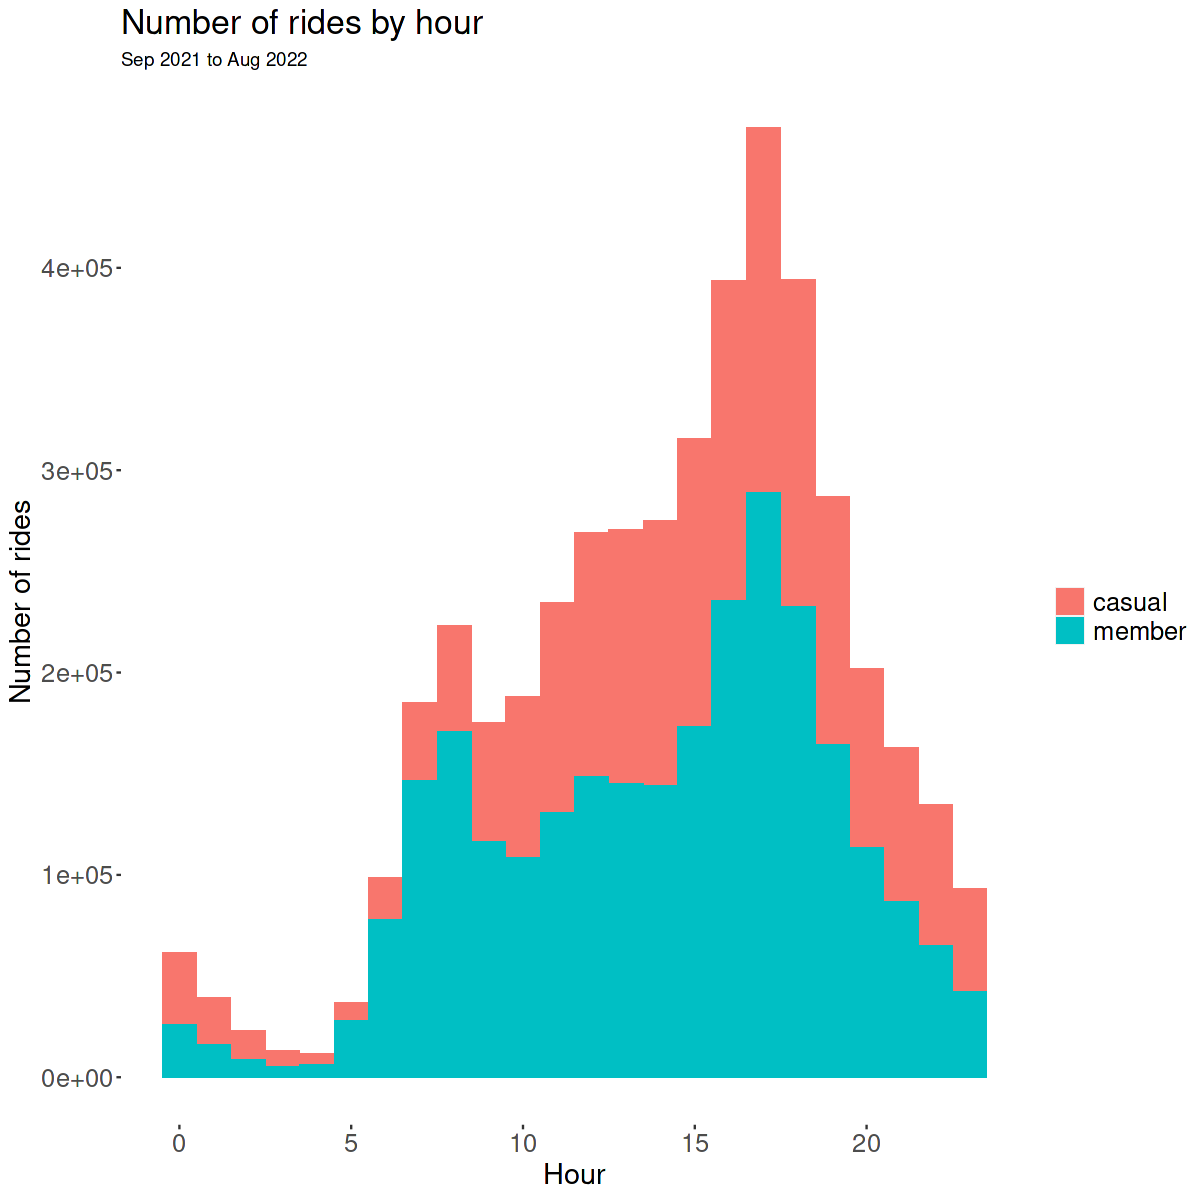

In [38]:
all_trips_cleaned$hour <- as.numeric(all_trips_cleaned$hour)
display(10,10)
ggplot(all_trips_cleaned, aes(x=hour, fill=member_casual))+geom_bar(stat="bin", bins = 24)+
    labs(title = "Number of rides by hour", subtitle = "Sep 2021 to Aug 2022", x="Hour", y="Number of rides", fill= "")+
    theme(legend.position = "right",legend.text = element_text(size=15),panel.background = element_rect(fill="white"), 
        axis.text = element_text(size=15),axis.title = element_text(size=17),plot.title = element_text(size=20))
                                                                

The majority of ridetrips occurs in business time between 8 am and 9 pm. There are two peaks of movement, one in the morning at 8 am and another in the afternoon at 5 pm.

## Key Findings

* The majority of annual members use bicycles for commuting to work or school and the majority of casual riders use them for tourism and leisure.

* There are three top stations that are mostly used by both.

## Conclusion

* Create a new campaign prioritizing the top three stations showing the advantages to be a annual user.

* Create discount campaign between May and September taking advantage of the largest number of trips in this period.

## Next Steps

* Monitor the next six months of campaigns to make sure it is getting good results

* Keep analysing why member users rather some stations than others and why some casual riders of those stations don't want to switch to annual membership.